<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/12week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target

pd.DataFrame(X, columns = iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X)
pd.DataFrame(X_reduced, columns = ["1_?", "2_?", "3_?"])

,1_?,2_?,3_?
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


In [3]:
X_95 = PCA(n_components = 0.95).fit_transform(X)

In [4]:
X_95

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [5]:
pca = PCA(n_components = 3)
X_reduced = pca.fit_transform(X)
X4D = pca.inverse_transform(X_reduced)
pd.DataFrame(X4D, columns = iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.099286,3.500723,1.401086,0.198295
1,4.868758,3.031661,1.447517,0.125368
2,4.693700,3.206384,1.309582,0.184951
3,4.623843,3.075837,1.463736,0.256958
4,5.019326,3.580414,1.370606,0.246168
...,...,...,...,...
145,6.565541,3.136265,5.404505,1.978794
146,6.219750,2.581327,5.122055,1.708294
147,6.456778,3.043802,5.265739,1.896748
148,6.185931,3.414258,5.421399,2.266390


In [6]:
# 주성분
print("주성분 : \n", pca.components_)

# 표현 분산
print("표현분산 : \n", pca.explained_variance_ratio_)

주성분 : 
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]
표현분산 : 
 [0.92461872 0.05306648 0.01710261]


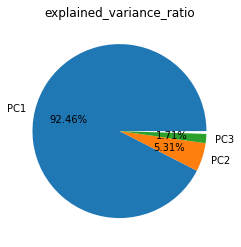

In [7]:
ratio = pca.explained_variance_ratio_
df_v = pd.DataFrame(ratio, index = ['PC1', 'PC2', 'PC3'], columns = ['V_ratio'])
plt.pie(df_v['V_ratio'], labels = df_v.index, autopct = '%.2f%%')
plt.title('explained_variance_ratio')
plt.show()

In [8]:
df_v

,V_ratio
PC1,0.924619
PC2,0.053066
PC3,0.017103


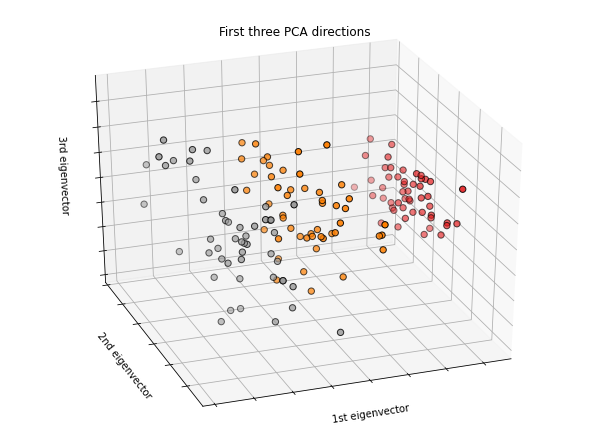

In [11]:
# 줄어든 차원으로 iris 데이터 시각화 하기
fig = plt.figure(1, figsize = (8, 6))
ax = Axes3D(fig, elev = -150, azim = 110)
X_reduced = PCA(n_components = 3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c = y,
    cmap = plt.cm.Set1,
    edgecolor = 'k',
    s = 40
)
ax.set_title("First three PCA directions")
ax.set_xlabel('1st eigenvector')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('2nd eigenvector')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('3rd eigenvector')
ax.w_zaxis.set_ticklabels([])
plt.show()

In [13]:
#  랜덤 PCA
rnd_pca = PCA(n_components = 3, svd_solver = 'randomized', random_state = 42)
X_reduced_rnd = rnd_pca.fit_transform(X)
X_reduced_rnd

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [16]:
# 점진적 PCA
from sklearn.decomposition import IncrementalPCA
import numpy as np
n_batches = 10
inc_pca = IncrementalPCA(n_components = 3)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced_inc = inc_pca.transform(X)

In [18]:
X_reduced_inc

array([[-2.68412075e+00,  3.19410679e-01, -2.83185072e-02],
       [-2.71414633e+00, -1.77030861e-01, -2.15843428e-01],
       [-2.88899594e+00, -1.44888267e-01,  1.66775353e-02],
       [-2.74533762e+00, -3.18307958e-01,  3.59456596e-02],
       [-2.72870898e+00,  3.26795891e-01,  9.31402092e-02],
       [-2.28085666e+00,  7.41449389e-01,  1.69229497e-01],
       [-2.82054573e+00, -8.92954996e-02,  2.60170682e-01],
       [-2.62613558e+00,  1.63363159e-01, -1.94468517e-02],
       [-2.88638673e+00, -5.78286486e-01,  2.24995640e-02],
       [-2.67273872e+00, -1.13922197e-01, -1.94101391e-01],
       [-2.50693354e+00,  6.45034277e-01, -7.48393630e-02],
       [-2.61273863e+00,  1.47008509e-02,  1.10883520e-01],
       [-2.78609985e+00, -2.35225376e-01, -2.06022674e-01],
       [-3.22380982e+00, -5.11334209e-01,  6.26226773e-02],
       [-2.64475096e+00,  1.17882191e+00, -1.61421281e-01],
       [-2.38603928e+00,  1.33828034e+00,  2.75994530e-01],
       [-2.62354927e+00,  8.10938071e-01

## 커널 PCA

In [19]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel = 'linear', fit_inverse_transform = True)
rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.0433, fit_inverse_transform = True)
sig_pca = KernelPCA(n_components = 2, kernel = 'sigmoid', gamma = 0.001, coef0 = 1, fit_inverse_transform = True)

X_reduced_lin = lin_pca.fit_transform(X)
X_reduced_rbf = rbf_pca.fit_transform(X)
X_reduced_sig = sig_pca.fit_transform(X)

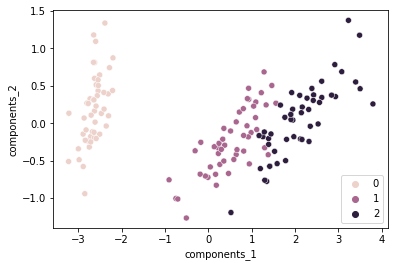

In [20]:
import seaborn as sns
sns.scatterplot(x = X_reduced_lin[:, 0], y = X_reduced_lin[:, 1], hue = y)
plt.xlabel('components_1')
plt.ylabel('components_2')
plt.show()

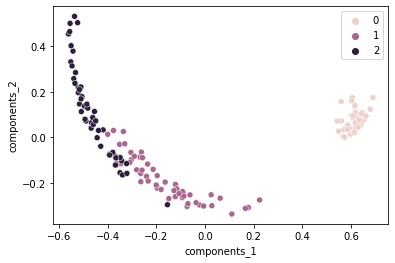

In [22]:
sns.scatterplot(x = X_reduced_rbf[:, 0], y = X_reduced_rbf[:, 1], hue = y)
plt.xlabel('components_1')
plt.ylabel('components_2')
plt.show()

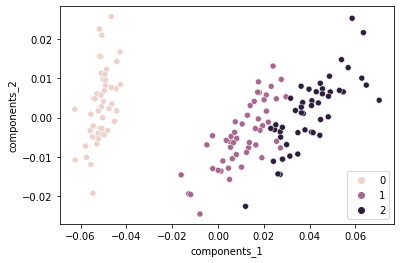

In [23]:
sns.scatterplot(x = X_reduced_sig[:, 0], y = X_reduced_sig[:, 1], hue = y)
plt.xlabel('components_1')
plt.ylabel('components_2')
plt.show()

## PCA 평가 방법

In [27]:
# 지도학습 모델과 함께 사용
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
                ('kpca', KernelPCA(n_components = 2)),
                ('log_reg', LogisticRegression(solver = 'lbfgs'))
])

param_grid = [{
    'kpca__gamma' : np.linspace(0.03, 0.05, 10),
    'kpca__kernel' : ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [30]:
# 재구성 오차
rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.0433, fit_inverse_transform = True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

0.158830063017041

## 차원 수 선택

In [31]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

2

# LDA

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(X, y)
X_reduced_lda = lda.transform(X
)

In [33]:
X_reduced_lda

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.